In [1]:
import numpy as np
import re
import random

import tensorflow as tf
import sklearn as sk

import Functions as fn
from DS import DS
from Set import pool
from Iterator import Iterator
from FFModel import FF_Model

# Data Loading

In [2]:
Dataset = pool()
Dataset.load_texts('raw_texts')
Dataset.load_labels('raw_labels')

Raw Text Load Complete
Raw Labels Load Complete


In [3]:
#print('Number of Texts: ', Dataset.size)
#print('Number of 2007 Smoking Challenge texts: ', Dataset.number_of(challenge='2007 Smoking Challenge'))
#print('Number of 2008 ObesityChallenge texts: ', Dataset.number_of(challenge='2008 Obesity Challenge'))
#print('Number of 2009 Medication Challenge texts: ', Dataset.number_of(challenge='2009 Medication Challenge'))
#print('Number of 2010 Relations Challenge texts: ', Dataset.number_of(challenge='2010 Relations Challenge'))
#print('Number of 2011 Coreference Challenge texts: ', Dataset.number_of(challenge='2011 Coreference Challenge'))
#print('Number of 2012 Temporal Relations Challenge texts: ', Dataset.number_of(challenge='2012 Temporal Relations Challenge'))
#print('Number of Train Texts: ', Dataset.number_of(stage='train'))
#print('Number of Test Texts: ', Dataset.number_of(stage='test'))
#print('Number of Labeled Texts: ', Dataset.number_of(labelled='yes'))
#print('Number of Initially Labeled Texts: ', Dataset.number_of(labelled='yes', label_type='train'))
#print('Number of Competitor Labeled Texts Texts: ', Dataset.number_of(labelled='yes', label_type='test'))

In [4]:
target_dict = fn.load_labels('labels')

Label Load Complete


# Embedding Generation

In [5]:
from gensim.models import Word2Vec

sentences = fn.load_sentences('sentences')

#model = Word2Vec(sentences, min_count=1, size=50)
#model.save('W2V')

model = Word2Vec.load('W2V')
vocab = model.wv.vocab.keys()

C:\Users\Luka\Anaconda3\envs\tensorflow\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Sentence Load Complete


In [6]:
#model.most_similar("prozac", topn=10)

# Window Testing

In [20]:
labelled_cases = Dataset.get_DS(labelled='yes')
labelled_cases.process_for_testing()
sets = fn.get_ff_traintest(labelled_cases, model, left_words=3, right_words=3)

In [21]:
print('Ratio: med: {:.2f}% non-med: {:.2f}%'.format(*(np.array(sets['train_labels']).sum(0)/ len(sets['train_labels']))))
fn.saturate_training_set_training(sets, 0.1)
print('Ratio: med: {:.2f}% non-med: {:.2f}%'.format(*(np.array(sets['train_labels']).sum(0)/ len(sets['train_labels']))))

Ratio: med: 0.03% non-med: 0.97%
Ratio: med: 0.11% non-med: 0.89%


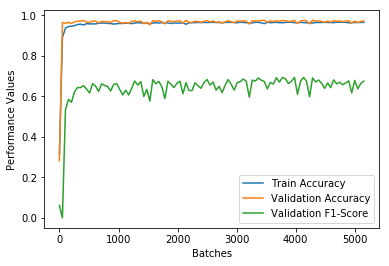

FInal Values: TrAcc: 0.965, ValAcc: 0.972, ValF1: 0.675
Test F1-Score: 0.658



In [22]:
NN = FF_Model(input_size=700, layers=[100])
NN.build_graph()
_,_,_,_ = NN.train(sets, epochs=1, batch=50, show_progress=True, show_plot=True)

In [23]:
res = NN.predict(sets['test_set'])
tru = np.argmax(sets['test_labels'], 1)

In [24]:
TP = len([a for a in range(len(tru)) if (res[a] == 0) and (tru[a] == 0)])
TN = len([a for a in range(len(tru)) if (res[a] == 1) and (tru[a] == 1)])
FP = len([a for a in range(len(tru)) if (res[a] == 0) and (tru[a] == 1)])
FN = len([a for a in range(len(tru)) if (res[a] == 1) and (tru[a] == 0)])
TFPN = [TP, TN, FP, FN]
print('TP\tTN\tFP\tFN\n{}\t{}\t{}\t{}'.format(*TFPN))

TP	TN	FP	FN
575	27341	434	164


In [74]:
for a in range(len(sets['test_words'])):
    if res[a] == 0 and tru[a] == 0:
        print(sets['test_words'][a].ljust(20), res[a], tru[a])

prednisone           0 0
plaquenil            0 0
aspirin              0 0
steroids             0 0
plaquenil            0 0
aspirin              0 0
prednisone           0 0
steroids             0 0
prednisone           0 0
plaquenil            0 0
aspirin              0 0
lisinopril           0 0
atenolol             0 0
aspirin              0 0
ibuprofen            0 0
albuterol            0 0
ibuprofen            0 0
acetylsalicylic      0 0
acid                 0 0
colace               0 0
(                    0 0
docusate             0 0
sodium               0 0
)                    0 0
enalapril            0 0
maleate              0 0
zocor                0 0
(                    0 0
simvastatin          0 0
)                    0 0
insulin              0 0
human                0 0
)                    0 0
heparin              0 0
heparin              0 0
motrin               0 0
heparin              0 0
naprosyn             0 0
naprosyn             0 0
atenolol             0 0


In [75]:
for a in range(len(sets['test_words'])):
    mark = ''
    if res[a] == 0 and tru[a] == 0:
        mark='!!!'
    print(sets['test_words'][a].ljust(20), mark)

record               
#<num>               
<num>                
|                    
reh                  
|                    
<num>                
|                    
|                    
<num>                
|                    
<num>/<num>/<num>    
<num>:<num>:<num>    
am                   
|                    
discharge            
summary              
|                    
unsigned             
|                    
dis                  
|                    
admission            
date                 
<num>/<num>/<num>    
report               
status               
unsigned             
discharge            
date                 
<num>/<num>/<num>    
history              
of                   
present              
illness              
this                 
is                   
a                    
<num>                
year                 
old                  
wark                 
na                   
bo                   
female               
with      

increasing           
dyspnea              
on                   
exertion             
and                  
substernal           
chest                
pain                 
,                    
which                
is                   
sharp                
,                    
increases            
with                 
cough                
or                   
deep                 
breaths              
she                  
denied               
any                  
orthopnea            
or                   
paroxysmal           
nocturnal            
dyspnea              
,                    
palpitations         
or                   
syncope              
she                  
has                  
no                   
nausea               
,                    
vomiting             
,                    
fevers               
,                    
chills               
or                   
melena               
she                  
does                 
have      

pr                   
or                   
st                   
segments             
compared             
with                 
<num>                
of                   
january              
,                    
and                  
no                   
decrease             
in                   
the                  
voltages             
hospital             
course               
problem              
#<num>               
was                  
substernal           
chest                
pain                 
this                 
seemed               
to                   
be                   
a                    
pericardial          
pain                 
secondary            
to                   
discontinuation      
of                   
her                  
prednisone           
and                  
plaquenil            
as                   
it                   
happened             
numerous             
times                
in                   
the       

with                 
left                 
groin                
erythematous         
and                  
scaling              
with                 
a                    
question             
of                   
fungal               
infection            
extremities          
-                    
no                   
edema                
she                  
had                  
<num>+               
dorsalis             
pedis                
pulses               
neuro                
examination          
-                    
she                  
was                  
alert                
she                  
knew                 
she                  
was                  
at                   
the                  
dellsbrothers        
loitmette            
hospital             
.                    
she                  
said                 
it                   
was                  
<num>                
,                    
july                 
,         

due                  
to                   
acute                
onset                
sob                  
and                  
concominant          
right                
lower                
extremity            
pain                 
,                    
leni's               
done                 
which                
were                 
negative             
for                  
dvt                  
patient              
felt                 
better               
with                 
ivf                  
given                
in                   
er                   
and                  
did                  
not                  
take                 
any                  
nebulizers           
while                
on                   
the                  
floor                
<num>.htn            
bp                   
well                 
controlled           
,                    
pt                   
has                  
never                
taken     

had                  
lower                
abdominal            
pain                 
,                    
extensive            
work                 
up                   
of                   
which                
revealed             
a                    
pulmonary            
emboli               
,                    
and                  
again                
she                  
was                  
heparinized          
and                  
coumadinized         
for                  
one                  
year                 
on                   
july                 
,                    
<num>                
she                  
developed            
the                  
acute                
onset                
of                   
intermittent         
chest                
pressure             
and                  
left                 
arm                  
heaviness            
,                    
associated           
with                 
night     

ruled                
out                  
,                    
the                  
patient's            
management           
could                
be                   
followed             
in                   
an                   
outpatient           
setting              
on                   
hospital             
day                  
number               
four                 
it                   
was                  
felt                 
that                 
she                  
was                  
safe                 
to                   
be                   
discharged           
to                   
home                 
operations           
and                  
procedures           
performed            
during               
this                 
hospitalization      
were                 
pulmonary            
arteriogram          
by                   
pa                   
hospital             
on                   
may                  
,         

heart                
rate                 
<num>                
,                    
bp                   
right                
arm                  
<num>/<num>          
heent                
perrla               
,                    
dentition            
without              
evidence             
of                   
infection            
,                    
left                 
carotid              
bruits               
,                    
right                
carotid              
bruit                
carotid              
bruits               
hard                 
to                   
distinguish          
from                 
radiated             
systolic             
murmur               
into                 
carotids             
chest                
no                   
incisions            
cardiovascular       
regular              
rate                 
and                  
rhythm               
,                    
systolic             
iii/vi    

<num>/<num>/<num>    
******               
final                
discharge            
orders               
******               
karpinsky            
,                    
loyd                 
o.                   
<num>-<num>-<num>-<num> 
midbluff             
drve                 
service              
ggi                  
discharge            
patient              
on                   
<num>/<num>/<num>    
at                   
<num>:<num>          
pm                   
contingent           
upon                 
not                  
applicable           
will                 
d/c                  
order                
be                   
used                 
as                   
the                  
d/c                  
summary              
yes                  
attending            
niedermayer          
,                    
armand               
kermit               
,                    
m.d                  
disposition          
home                 
dischar

consistent           
,                    
no                   
viral                
prodome              
,                    
no                   
ekg                  
changes              
,                    
no                   
pulsus/rub           
appreciated          
no                   
reproducible/msk     
pain                 
her                  
pain                 
was                  
only                 
controlled           
with                 
oxycodone            
she                  
was                  
pain-free            
at                   
discharge.pt         
was                  
continued            
on                   
all                  
her                  
outpatient           
medications.         
no                   
changes              
pt                   
will                 
be                   
discharged           
to                   
home                 
with                 
follow-up            
already   

svr                  
<num>                
,                    
<num>                
,                    
pvr                  
<num>                
,                    
pa                   
<num>/<num>          
,                    
cardiac              
output               
<num>.<num>          
grafts               
from                 
the                  
aorta                
to                   
the                  
om                   
,                    
aorta                
to                   
the                  
rca                  
and                  
lima                 
to                   
the                  
lad                  
were                 
all                  
patent               
lad                  
showed               
<num>%               
proximal             
occlusion            
,                    
lad                  
diagonal             
showed               
a                    
<num>%               
long      

simvastatin          
)                    
<num>                
mg                   
po                   
qhs                  
food/drg             
interaction          
instruction          
avoid                
grapefruit           
unless               
md                   
instructs            
otherwise            
flovent              
(                    
fluticasone          
propionate           
)                    
<num>                
mcg                  
inh                  
bid                  
combivent            
(                    
ipratropium          
and                  
albuterol            
sulfate              
)                    
<num>                
puff                 
inh                  
qid                  
diet                 
house                
/                    
low                  
chol/low             
sat.                 
fat                  
diet                 
house                
/                    
ada       

<num>                
mg                   
q                    
day.                 
<num>                
glyburide            !!!
<num>                
mg                   
q                    
day.                 
<num>                
labetalol            !!!
<num>                
mg                   
b.i.d                
<num>                
timoptic             
,                    
xylatan              
drops                
for                  
glaucoma             
allergies            
lidocaine            
leads                
to                   
rash                 
lisinopril           
leads                
to                   
cough                
diltiazem            
leads                
to                   
edema                
nifedipine           
leads                
to                   
edema                
intravenous          
contrast             
leads                
to                   
hives                
family               
hist

p.o.                 
q                    
<num>                
hours                
levofloxacin         !!!
<num>                
mg                   
p.o.                 
q                    
<num>                
hours                
xalatan              
<num>                
drop                 
ou                   
q                    
p.m                  
timoptic             !!!
<num>.<num>%         
<num>                
drop                 
os                   
q                    
day                  
condition            
on                   
discharge            
stable               
disposition          
the                  
patient              
was                  
discharged           
to                   
home                 
and                  
required             
no                   
services             
discharge            
instructions         
the                  
patient              
was                  
advised              
to  

ii-xii               
are                  
intact               
motor                
is                   
<num>/<num>          
in                   
the                  
upper                
and                  
lower                
extremities          
bilaterally          
sensation            
is                   
equal                
bilaterally          
,                    
in                   
the                  
upper                
extremities          
,                    
lower                
extremities          
,                    
and                  
face                 
there                
is                   
no                   
dysmetria            
or                   
dysarthria           
finger-to-nose       
is                   
fast                 
and                  
accurate             
bilaterally          
there                
is                   
no                   
drift                
skin                 
is        

pain                 
was                  
strictly             
a                    
result               
of                   
a                    
musculoskeletal      
pain                 
this                 
pain                 
was                  
well                 
controlled           
with                 
the                  
combination          
of                   
dilaudid             !!!
and                  
oxycodone            
he                   
was                  
encouraged           
to                   
take                 
several              
deep                 
breaths              
per                  
hour                 
to                   
reduce               
the                  
risk                 
of                   
atelectasis          
or                   
pneumonia            
<num>                
infectious           
disease              
there                
was                  
no                   
evidenc

discharged           
to                   
rehab                
of                   
note                 
,                    
he                   
has                  
been                 
afebrile             
for                  
more                 
than                 
<num>                
hours                
while                
on                   
the                  
ancef                
,                    
and                  
his                  
white                
count                
has                  
improved             
dramatically         
,                    
into                 
the                  
approximately        
<num>                
range                
he                   
will                 
continue             
to                   
get                  
iv                   
ancef                
q.<num>h.            
for                  
an                   
additional           
<num>                
days      

manual               
,                    
m.d                  
potentially          
serious              
interaction          
warfarin             !!!
&amp;                
simvastatin          !!!
reason               
for                  
override             
aware                
insulin              !!!
<num>/<num>          !!!
(                    !!!
human                !!!
)                    !!!
<num>                
units                
qam;                 
<num>                
units                
qpm                  
sc                   
<num>                
units                
qam                  
<num>                
units                
qpm                  
cozaar               
(                    
losartan             
)                    
<num>                
mg                   
po                   
qd                   
number               
of                   
doses                
required             
(                    
approximate

intubated            
in                   
the                  
ct                   
scan                 
room                 
,                    
sedated              
and                  
paralyzed            
while                
the                  
study                
was                  
completed            
when                 
he                   
arrived              
in                   
the                  
intensive            
care                 
unit                 
,                    
he                   
had                  
a                    
heart                
beat                 
in                   
the                  
<num>s               
with                 
complete             
heart                
block                
,                    
which                
was                  
transient            
and                  
with                 
subsequent           
return               
to                   
normal    

gram                 
sodium               
activity             
resume               
regular              
exercise             
follow               
up                   
appointment(         
s                    
):                   
please               
schedule             
appointment          
with                 
primary              
care                 
doctor               
at                   
the                  
bccmc                
early                
next                 
week                 
,                    
allergy              
erythromycins        
admit                
diagnosis            
pneumonia            
principal            
discharge            
diagnosis            
;responsible         
after                
study                
for                  
causing              
admission            
)                    
copd                 
flare                
,                    
right                
heart                
failure   

,                    
and                  
a                    
left                 
radial               
artery               
graft                
to                   
the                  
right                
coronary             
artery               
the                  
patient              
did                  
well                 
postoperatively      
he                   
was                  
discharged           
to                   
home                 
in                   
stable               
condition            
on                   
<num>/<num>/<num>    
the                  
patient              
noted                
his                  
left                 
lower                
leg                  
to                   
be                   
warm                 
and                  
swollen              
with                 
redness              
and                  
presented            
to                   
see                  
dr        

stable               
bun                  
and                  
creatinine           
and                  
was                  
extubated            
on                   
<num>/<num>          
a                    
right                
heart                
catheterization      
there                
showed               
a                    
pulmonary            
artery               
pressure             
of                   
<num>/<num>          
,                    
wedge                
of                   
<num>                
,                    
cardiac              
output               
of                   
<num>.<num>          
hemodymanics         
in                   
the                  
intensive            
care                 
unit                 
at                   
chebanks             
hospital             
indicate             
the                  
patient's            
cardiac              
output               
was                  
quite     

psychiatry           
the                  
patient              
has                  
clearly              
severe               
anxiety              
and                  
was                  
in                   
a                    
full                 
panic                
attack               
on                   
admission            
she                  
was                  
treated              
acutely              
with                 
ativan               !!!
and                  
her                  
problem              
resolved             
quite                
well                 
,                    
and                  
she                  
became               
more                 
comfortable          
in                   
the                  
hospital             
diabetes             
mellitus             
glyburide            
was                  
held                 
initially            
on                   
admission            
she    

controlled           
his                  
bp                   
pt                   
was                  
sent                 
home                 
on                   
hctz                 
<num>mg              
daily                
and                  
atenolol             
<num>mg              
daily                
consider             
outpatient           
w/u                  
of                   
thickened            
adrenal              
gland                
if                   
bp                   
is                   
difficult            
to                   
control              
*                    
pulm                 
-                    
pt                   
thought              
to                   
have                 
very                 
mild                 
asthma               
exacerbation         
and                  
likely               
has                  
a                    
restrictive          
ventilatory          
defect    

<num>                
mg                   
b.i.d                
<num>                
metformin            
<num>                
mg                   
daily                
<num>                
insulin              
<num>/<num>          
<num>                
units                
q.a.m.               
,                    
<num>                
units                
q.p.m                
<num>                
calcium              
<num>                
mg                   
p.o.                 
b.i.d                
<num>                
magnesium            
<num>                
mg                   
p.o.                 
b.i.d                
<num>                
multivitamin         
<num>                
iron                 
tablets              
<num>                
actonel              
every                
wednesday            
social               
history              
the                  
patient              
quit                 
smoking              
in        

of                   
diarrhea             
prior                
to                   
admission            
along                
with                 
some                 
abdominal            
cramping             
the                  
patient              
was                  
continued            
on                   
her                  
ppi                  
for                  
gerd                 
prophylaxis          
at                   
one                  
point                
,                    
she                  
required             
increasing           
her                  
dosage               
of                   
nexium               
secondary            
to                   
gerd-like            
symptoms             
it                   
seemed               
that                 
increasing           
the                  
amount               
of                   
nexium               
she                  
received             
,         

actually             
grew                 
out                  
a                    
species              
of                   
abiotrophia          
there                
is                   
only                 
one                  
culture              
positive             
,                    
that                 
was                  
taken                
on                   
february             
.                    
she                  
has                  
had                  
no                   
subsequent           
cultures             
growing              
out                  
at                   
the                  
time                 
of                   
this                 
dictation            
we                   
appreciate           
the                  
infectious           
disease              
team                 
following            
their                
recommendations      
were                 
to                   
hold      

enzymes              
started              
on                   
heparin              !!!
===                  
exam                 
<num>.<num>          
,                    
<num>-<num>          
,                    
<num>/<num>          
,                    
<num>                
,                    
<num>%               
<num>l               
general              
nad                  
,                    
euvolemic            
,                    
clear                
chest                
,                    
rrr                  
no                   
mgr                  
,                    
no                   
edema                
===                  
labs                 
tni                  
neg                  
x                    
<num>                
===                  
cath                 
<num>/<num>          
<num>%               
lad                  
,                    
no                   
intervention         
===                  
ekg    

procedures           
other                
treatments/procedures 
(                    
not                  
in                   
o.r.                 
)                    
cxr                  
,                    
diuresis             
with                 
iv                   
medications          !!!
,                    
ekg                  
,                    
r/o                  
mi                   
,                    
abdo                 
ct                   
brief                
resume               
of                   
hospital             
course               
pt                   
ms                   
watterson            
,                    
<num>m               
****                 
cc                   
increasing           
sob                  
,                    
weight               
gain                 
****                 
hpi                  
pt                   
is                   
a                    
<num>f               
with  

pedal                
edema                
****                 
code                 
dnr/dni              
additional           
comments             
please               
resume               
your                 
normal               
home                 
medications          
the                  
following            
antibiotics          
were                 
added                
levofloxacin         
<num>mg              
by                   
mouth                
every                
<num>                
hours                
for                  
<num>                
days                 
cefpodoxime          
<num>mg              
by                   
moouth               
once                 
daily                
for                  
<num>                
days                 
**                   
the                  
following            
medications          
were                 
added                
tessalon             
perels               
<num>mg   

diabetes             
mellitus             
,                    
coronary             
artery               
disease              
,                    
status               
post                 
coronary             
artery               
bypass               
grafting             
in                   
<num>                
(                    
left                 
internal             
mammary              
artery               
to                   
left                 
anterior             
descending           
and                  
saphenous            
vein                 
graft                
to                   
obtuse               
marginal             
)                    
,                    
now                  
with                 
episodes             
of                   
rapid                
heart                
rate                 
and                  
episodes             
of                   
skipped              
beats                
in        

In [12]:
pred = [0 if word in target_dict['medications'] else 1 for word in sets['test_words']]

In [13]:
sk.metrics.f1_score(tru, pred, pos_label=0, average='binary')

0.19469026548672566

In [25]:
trainer_cases = labelled_cases.get_DS(stage = 'train')
temp_sets = fn.get_ff_traintest(trainer_cases, model, left_words=3, right_words=3)
temp_sets['set'] = temp_sets['train_set'] + temp_sets['validation_set'] + temp_sets['test_set']
temp_sets['labels'] = temp_sets['train_labels'] + temp_sets['validation_labels'] + temp_sets['test_labels']

In [26]:
res2 = NN.predict(temp_sets['set'])
tru2 = np.argmax(temp_sets['labels'], 1)

In [27]:
sk.metrics.f1_score(tru2, res2, pos_label=0, average='binary')

0.75141884222474453

In [28]:
TP2 = len([a for a in range(len(tru2)) if (res2[a] == 0) and (tru2[a] == 0)])
TN2 = len([a for a in range(len(tru2)) if (res2[a] == 1) and (tru2[a] == 1)])
FP2 = len([a for a in range(len(tru2)) if (res2[a] == 0) and (tru2[a] == 1)])
FN2 = len([a for a in range(len(tru2)) if (res2[a] == 1) and (tru2[a] == 0)])
TFPN2 = [TP2, TN2, FP2, FN2]
print('TP\tTN\tFP\tFN\n{}\t{}\t{}\t{}'.format(*TFPN2))

TP	TN	FP	FN
331	10606	132	87


In [137]:
trainer_words = [word for case in trainer_cases.data for word in case.test_text]

for a in range(len(trainer_words)):
    mark = ''
    if res2[a] == 1 and tru2[a] == 0:
        mark='!!!'
    print(trainer_words[a].ljust(20), mark)

record               
#<num>               
<num>                
|                    
tmh                  
|                    
<num>                
|                    
|                    
<num>                
|                    
<num>/<num>/<num>    
<num>:<num>:<num>    
am                   
|                    
discharge            
summary              
|                    
signed               
|                    
dis                  
|                    
admission            
date                 
<num>/<num>/<num>    
report               
status               
signed               
discharge            
date                 
<num>/<num>/<num>    
history              
ms                   
pizzo                
is                   
a                    
<num>-year-old       
woman                
with                 
peripheral           
vascular             
disease              
who                  
recently             
underwent            
revision  

she                  
proceeded            
to                   
the                  
angiography          
suite                
she                  
was                  
found                
to                   
have                 
two                  
<num>%               
stenosis             
in                   
a                    
long                 
segment              
of                   
the                  
left                 
sfa                  
and                  
the                  
left                 
distal               
sfa                  
and                  
anterior             
tibial               
vein                 
graft                
was                  
completely           
thrombosed           
she                  
was                  
successfully         
treated              
with                 
stent                
placement            
and                  
received             
heparin              
and       

urinary              
tract                
infection            
and                  
was                  
started              
on                   
ciprofloxacin        
for                  
a                    
total                
of                   
five                 
days                 
the                  
patient              
at                   
one                  
point                
required             
<num>                
liters               
of                   
nasal                
cannula              !!!
to                   
get                  
his                  
saturations          
in                   
the                  
<num>s               
he                   
did                  
continue             
to                   
require              
intravenous          
lasix                
but                  
had                  
weaned               
lasix                
drip                 
and                  
had    

be                   
tense                
with                 
hematoma             
secondary            
to                   
blood                
draws                
vascular             
surgery              
was                  
consulted            
in                   
the                  
morning              
on                   
january              
,                    
<num>                
,                    
in                   
order                
to                   
assess               
the                  
right                
groin                
hematoma             
as                   
well                 
as                   
the                  
hematoma             
in                   
the                  
left                 
arm                  
due                  
to                   
concern              
for                  
developing           
compartment          
syndrome             
vascular             
surgery   

<num>                
history              
of                   
chronic              
right                
foot                 
ulcer                
home                 
medications          
colace               
<num>                
mg                   
b.i.d.               
,                    
folate               
<num>                
mg                   
p.o.                 
daily                
,                    
gemfibrozil          
<num>                
mg                   
b.i.d.               
,                    
lantus               
<num>                
mg                   
subcu                
q.p.m.               
,                    
lipitor              
<num>                
mg                   
nightly              
,                    
nephrocaps           
,                    
neurontin            
<num>                
mg                   
daily                
,                    
phoslo               
<num>                
mg        

outpatient           
his                  
lipid                
panel                
was                  
checked              
tc                   
<num>                
,                    
tg                   
<num>                
,                    
ldl                  
<num>                
,                    
hdl                  
<num>                
given                
that                 
his                  
ldl                  
was                  
<num>                
and                  
the                  
risk                 
of                   
rhabdomylosis        
on                   
high                 
dose                 
gemfibrozil          
and                  
lipitor              
,                    
his                  
lipitor              
was                  
decreased            
to                   
<num>mg              
he                   
should               
have                 
a                    
repeat    

examination          
general              
appearance           
,                    
very                 
pleasant             
man                  
in                   
no                   
apparent             
distress             
temperature          
<num>.<num>          
,                    
pulse                
<num>                
,                    
blood                
pressure             
<num>/<num>          
,                    
respirations         
<num>                
,                    
o<num>               
saturation           
<num>%               
on                   
two                  
liters               
heent                
pupils               
are                  
equal                
,                    
round                
,                    
and                  
reactive             
to                   
light                
sclerae              
anicteric            
oral                 
pharynx              
clear     

<num>s               
consistently         
through              
the                  
course               
of                   
the                  
day                  
that                 
his                  
next                 
dose                 
of                   
aspart               
be                   
either               
halved               
or                   
held                 
as                   
the                  
patient              
easily               
becomes              
hypoglycemic         
and                  
is                   
unable               
to                   
recognize            
the                  
symptoms             
of                   
hypoglycemia         
himself              
at                   
the                  
time                 
of                   
discharge            
,                    
the                  
patient's            
fingersticks         
were                 
well      

<num>                
cm                   
,                    
her                  
lungs                
had                  
scattered            
crackles             
at                   
the                  
bases                
,                    
her                  
heart                
was                  
regular              
with                 
an                   
s<num>               
,                    
her                  
belly                
was                  
soft                 
and                  
nontender            
,                    
her                  
extremities          
had                  
trace                
edema                
,                    
and                  
her                  
rectal               
examination          
showed               
guaiac               
negative             
brown                
stool                
laboratory           
examination          
her                  
ekg       

<num>/<num>/<num>    
by                   
:                    
potentially          
serious              
interaction          
warfarin             
&amp;                
aspirin              
reason               
for                  
override             
ok                   
diet                 
no                   
restrictions         
activity             
resume               
regular              
exercise             
follow               
up                   
appointment(         
s                    
):                   
vasc                 
ular                 
surgery              
,                    
pcp                  
,                    
arrange              
inr                  
to                   
be                   
drawn                
on                   
<num>/<num>/<num>    
with                 
f/u                  
inr's                
to                   
be                   
drawn                
every                
<num>     

mechanical           
fall                 
principal            
discharge            
diagnosis            
;responsible         
after                
study                
for                  
causing              
admission            
)                    
mechanical           
fall                 
other                
diagnosis;conditions 
,                    
infections           
,                    
complications        
,                    
affecting            
treatment/stay       
htn                  
chf                  
s/p                  
st                   
jude                 
mvr                  
for                  
ms                   
(                    
s/p                  
cardiac              
valve                
replacement          
)                    
hx                   
afib/flutte          
r                    
(                    
h/o                  
atrial               
fibrillation         
)                    
s/p       

after                
food                 
)                    
loratadine           
<num>                
mg                   
po                   
qd                   
food/drg             
interaction          
instruction          
avoid                
grapefruit           
unless               
md                   
instructs            
otherwise            
give                 
on                   
an                   
empty                
stomach              
(                    
give                 
<num>hr              
before               
or                   
<num>hr              
after                
food                 
)                    
potassium            
chloride             
slow                 
rel.                 
(                    
kcl                  
slow                 
release              
)                    
<num>                
meq                  
po                   
qd                   
as                   
per       

# HyperParameter Scan

In [ ]:
emb_sizes = [100]
emb_models = 1
target_saturations = [0.05, 0.1, 0.2, 0.5, 0.7]
layer_sizes = [50]
dropouts = [1.0]
learn_rates = [0.01]
epochs = [100]
NN_num = 5

case_num = len(emb_sizes)*emb_models*len(layer_sizes)*len(target_saturations)*len(epochs)*len(dropouts)*len(learn_rates)*NN_num
print(case_num)

In [ ]:
max_performance = 0
n = 1

for emb_size in emb_sizes:
    print('Model Number: %d/%d' %(n, case_num))
    for i in range(emb_models):
        model = Word2Vec(sentences, min_count=1, size=emb_size)
        for saturation in target_saturations:
            sets = fn.get_traintest2 (labelled_cases, model)
            fn.saturate_training_set(sets, model, target_dict['medications'], saturation)
            for layer_size in layer_sizes:
                for drop in dropouts:
                    for rate in learn_rates:
                        for epoch in epochs:
                            for j in range(NN_num):
                                print('Model Number: %d/%d' %(n, case_num))
                                print('ES: %d EM: %d sat: %f, LS: %d, drop: %f, LR: %f, epochs: %d, NN: %d' \
                                       % (emb_size, i, saturation, layer_size, drop, rate, epoch, j))
                                NN = FF_Model(input_size=emb_size, layers=[layer_size], dropout=drop, learn_rate=rate)
                                NN.build_graph()
                                NN.train(sets, epochs=epoch)
                                res = NN.predict(sets['test_set'])
                                tru = np.argmax(sets['test_labels'], 1)
                                perf = sk.metrics.f1_score(tru, res, pos_label=0)
                                if perf > max_performance:
                                    max_performance = perf
                                    NN.save_model('gold')
                                    model.save('gold/GOLDEMB')
                                NN.close()
                                n += 1